In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
%matplotlib inline

In [2]:
weather = pd.read_csv('day.csv', parse_dates=['dteday'])
weather.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
bike_share = pd.read_csv('2012-Q1-cabi-trip-history-data.csv', parse_dates=['Start date', 'End date'])
bike_share.head()

,Duration,Start date,End date,Start Station,End Station,Bike#,Type
0,0h 7m 55sec.,2012-01-01 00:04:00,2012-01-01 00:11:00,7th & R St NW / Shaw Library,7th & T St NW,W01412,Registered
1,0h 19m 22sec.,2012-01-01 00:10:00,2012-01-01 00:29:00,Georgia & New Hampshire Ave NW,16th & Harvard St NW,W00524,Casual
2,0h 19m 5sec.,2012-01-01 00:10:00,2012-01-01 00:29:00,Georgia & New Hampshire Ave NW,16th & Harvard St NW,W00235,Registered
3,0h 8m 5sec.,2012-01-01 00:15:00,2012-01-01 00:23:00,14th & V St NW,Park Rd & Holmead Pl NW,W00864,Registered
4,0h 7m 51sec.,2012-01-01 00:15:00,2012-01-01 00:23:00,11th & Kenyon St NW,7th & T St NW,W00995,Registered


In [4]:
bike_share.drop('Duration', 1, inplace=True)

In [5]:
bike_share.drop('Bike#', 1, inplace=True)

In [6]:
bike_share['start_date_short'] = pd.to_datetime(bike_share['Start date'].dt.strftime('%Y-%m-%d'))

In [7]:
bike_share['end_date_short'] = pd.to_datetime(bike_share['End date'].dt.strftime('%Y-%m-%d'))

In [8]:
bike_share['time_diff'] = bike_share['End date'] - bike_share['Start date']
bike_share['time_diff'] = bike_share['time_diff'].astype('timedelta64[m]')

In [9]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364223 entries, 0 to 364222
Data columns (total 8 columns):
Start date          364223 non-null datetime64[ns]
End date            364223 non-null datetime64[ns]
Start Station       364223 non-null object
End Station         364223 non-null object
Type                364223 non-null object
start_date_short    364223 non-null datetime64[ns]
end_date_short      364223 non-null datetime64[ns]
time_diff           364223 non-null float64
dtypes: datetime64[ns](4), float64(1), object(3)
memory usage: 22.2+ MB


In [10]:
weather.drop('instant', 1, inplace=True)

In [11]:
weather.drop('yr', 1, inplace=True)

In [12]:
weather.drop('casual', 1, inplace=True)

In [13]:
weather.drop('registered', 1, inplace=True)

In [14]:
weather.drop('cnt', 1, inplace=True)

In [35]:
merged_data = pd.merge(bike_share, weather, how='left', left_on='start_date_short', right_on='dteday')

In [36]:
merged_data.head()

,Start date,End date,Start Station,End Station,Type,start_date_short,end_date_short,time_diff,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2012-01-01 00:04:00,2012-01-01 00:11:00,7th & R St NW / Shaw Library,7th & T St NW,Registered,2012-01-01,2012-01-01,7.0,2012-01-01,1,1,0,0,0,1,0.37,0.375621,0.6925,0.192167
1,2012-01-01 00:10:00,2012-01-01 00:29:00,Georgia & New Hampshire Ave NW,16th & Harvard St NW,Casual,2012-01-01,2012-01-01,19.0,2012-01-01,1,1,0,0,0,1,0.37,0.375621,0.6925,0.192167
2,2012-01-01 00:10:00,2012-01-01 00:29:00,Georgia & New Hampshire Ave NW,16th & Harvard St NW,Registered,2012-01-01,2012-01-01,19.0,2012-01-01,1,1,0,0,0,1,0.37,0.375621,0.6925,0.192167
3,2012-01-01 00:15:00,2012-01-01 00:23:00,14th & V St NW,Park Rd & Holmead Pl NW,Registered,2012-01-01,2012-01-01,8.0,2012-01-01,1,1,0,0,0,1,0.37,0.375621,0.6925,0.192167
4,2012-01-01 00:15:00,2012-01-01 00:23:00,11th & Kenyon St NW,7th & T St NW,Registered,2012-01-01,2012-01-01,8.0,2012-01-01,1,1,0,0,0,1,0.37,0.375621,0.6925,0.192167


In [37]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364223 entries, 0 to 364222
Data columns (total 19 columns):
Start date          364223 non-null datetime64[ns]
End date            364223 non-null datetime64[ns]
Start Station       364223 non-null object
End Station         364223 non-null object
Type                364223 non-null object
start_date_short    364223 non-null datetime64[ns]
end_date_short      364223 non-null datetime64[ns]
time_diff           364223 non-null float64
dteday              364223 non-null datetime64[ns]
season              364223 non-null int64
mnth                364223 non-null int64
holiday             364223 non-null int64
weekday             364223 non-null int64
workingday          364223 non-null int64
weathersit          364223 non-null int64
temp                364223 non-null float64
atemp               364223 non-null float64
hum                 364223 non-null float64
windspeed           364223 non-null float64
dtypes: datetime64[ns](5), float6

In [38]:
merged_data.tail()

,Start date,End date,Start Station,End Station,Type,start_date_short,end_date_short,time_diff,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
364218,2012-03-31 23:53:00,2012-04-01 00:03:00,18th & Bell St,23rd & Crystal Dr,Casual,2012-03-31,2012-04-01,10.0,2012-03-31,2,3,0,6,0,2,0.424167,0.421708,0.738333,0.250617
364219,2012-03-31 23:53:00,2012-04-01 00:04:00,18th & Bell St,23rd & Crystal Dr,Casual,2012-03-31,2012-04-01,11.0,2012-03-31,2,3,0,6,0,2,0.424167,0.421708,0.738333,0.250617
364220,2012-03-31 23:54:00,2012-04-01 00:05:00,5th St & K St NW,1st & Rhode Island Ave NW,Registered,2012-03-31,2012-04-01,11.0,2012-03-31,2,3,0,6,0,2,0.424167,0.421708,0.738333,0.250617
364221,2012-03-31 23:56:00,2012-03-31 23:59:00,3rd & D St SE,1st & K St SE,Registered,2012-03-31,2012-03-31,3.0,2012-03-31,2,3,0,6,0,2,0.424167,0.421708,0.738333,0.250617
364222,2012-03-31 23:59:00,2012-04-01 00:01:00,23rd & Crystal Dr,18th & Bell St,Registered,2012-03-31,2012-04-01,2.0,2012-03-31,2,3,0,6,0,2,0.424167,0.421708,0.738333,0.250617


In [39]:
merged_data.drop('dteday', 1, inplace=True)

In [40]:
merged_data[merged_data['End Station'].isnull()]

,Start date,End date,Start Station,End Station,Type,start_date_short,end_date_short,time_diff,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed


In [41]:
merged_data.dropna(inplace=True)

In [42]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364223 entries, 0 to 364222
Data columns (total 18 columns):
Start date          364223 non-null datetime64[ns]
End date            364223 non-null datetime64[ns]
Start Station       364223 non-null object
End Station         364223 non-null object
Type                364223 non-null object
start_date_short    364223 non-null datetime64[ns]
end_date_short      364223 non-null datetime64[ns]
time_diff           364223 non-null float64
season              364223 non-null int64
mnth                364223 non-null int64
holiday             364223 non-null int64
weekday             364223 non-null int64
workingday          364223 non-null int64
weathersit          364223 non-null int64
temp                364223 non-null float64
atemp               364223 non-null float64
hum                 364223 non-null float64
windspeed           364223 non-null float64
dtypes: datetime64[ns](4), float64(5), int64(6), object(3)
memory usage: 52.8+ MB


In [43]:
merged_data[merged_data['End Station'].isnull()]

,Start date,End date,Start Station,End Station,Type,start_date_short,end_date_short,time_diff,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed


In [49]:
merged_data.rename(columns={'End Station': 'End station', 'Start Station': 'Start station', 'Type':'Member Type'}, inplace=True)

In [50]:
merged_data.columns

Index(['Start date', 'End date', 'Start station', 'End station', 'Member Type',
       'start_date_short', 'end_date_short', 'time_diff', 'season', 'mnth',
       'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp',
       'hum', 'windspeed'],
      dtype='object')

In [51]:
merged_data.describe()

,time_diff,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,364223.000000,364223.000000,364223.000000,364223.000000,364223.000000,364223.000000,364223.000000,364223.000000,364223.000000,364223.000000,364223.000000
mean,15.768661,1.175527,2.186875,0.020240,3.113859,0.724468,1.357484,0.380294,0.374925,0.593953,0.205817
std,36.653796,0.380418,0.826041,0.140822,1.931668,0.446782,0.491523,0.114233,0.108212,0.149362,0.084383
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.107500,0.101658,0.290000,0.073396
25%,6.000000,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.287500,0.293558,0.481250,0.141179
50%,10.000000,1.000000,2.000000,0.000000,3.000000,1.000000,1.000000,0.366667,0.361104,0.562083,0.190929
75%,16.000000,1.000000,3.000000,0.000000,5.000000,1.000000,2.000000,0.472500,0.464000,0.728750,0.236950
max,4144.000000,2.000000,3.000000,1.000000,6.000000,1.000000,3.000000,0.601667,0.570067,0.911250,0.441563


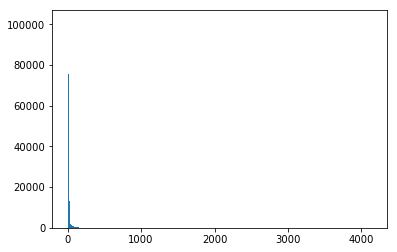

In [52]:
fig, ax = plt.subplots()
ax.hist(merged_data['time_diff'], bins=1000)
plt.show()

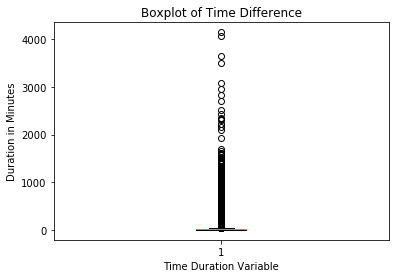

In [53]:
fig, ax = plt.subplots()
ax.boxplot(merged_data['time_diff'])
ax.set_title('Boxplot of Time Difference')
ax.set_ylabel('Duration in Minutes')
ax.set_xlabel('Time Duration Variable')
plt.show()

In [54]:
merged_data.to_csv('bikeshare_2012_q1.csv')